> ## **Métodos Computacionales II - Primer Parcial**

**Hecho por:** Thomas Andrade Hernández (202214695) & Juan Carlos Rojas V. (202214037)

---

In [6]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from scipy import integrate
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

**3. Falling ball:** (a) (Teórico) Usando la conversión de energía cinética a potencial y la definición de coeficiente de restitución, muestre que el coeficiente de restitución se puede calcular como:

$$e = \sqrt{\frac{h_{1}}{h_{0}}}$$

donde $h_{0}$ es la altura inicial de la caída y $h_{1}$ es la altura que alcanza la partícula después de chocar con el piso.

Consideremos la relación existente entre las energías de antes y después de la colisión. Sabemos que al momento del contacto de la partícula con el piso, la relación entre energía cinética a potencial pasa de ser una igualdad directa a una relación de proporcionalidad mediada por el coeficiente de resititución. Dicha relación se ve como:

$$mgh_{1} = \frac{1}{2}m(ev_{0})^{2}$$

donde $e$ es coeficiente de restitución de interés. Si se reparten términos podemos reescribir la expresión como:

$$mgh_{1} = \left(\frac{1}{2}mv_{0}^{2}\right) \cdot e^{2}$$

en un escenario de conservación de energía se puede establecer la igualdad: $\frac{1}{2}mv_{0}^{2} = mgh_{0}$. Introduciendo este detalle y despejando se tiene:

$$mgh_{1} = \left(\frac{1}{2}mv_{0}^{2}\right) \cdot e^{2} = mgh_{0} \cdot e^{2}$$

$$mgh_{1} = mgh_{0} \cdot e^{2}$$

$$e^{2} = \frac{h_{1}}{h_{0}} \quad \longrightarrow \quad e = \sqrt{\frac{h_{1}}{h_{0}}}$$

El resultado esperado.

---

(b) ¿Qué tiempo tarda la pelota en dejar de rebotar?

A continuación se puede observar el código que genera la animación de la partícula.

In [253]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
    
        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        self.PE = np.zeros(len(t))
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = np.array([0, -9.8])

        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d     
            self.f = np.add(self.f,Fn*self.n)
            # Falta implementar energía potencial 
            
     
    # Aca debes agregar la energía potencial
    def ResetForce(self):
        self.f[:] = 0.
        self.a = [0., 9.8]
    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        self.PE[i] = self.m*9.8*self.r[1]
        self.A[i] = self.a
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    # Debes agregar las paredes en este punto
    def CheckLimits(self):
        
        for i in range(2):
            
            if self.r[i] + self.radius > 20 and self.v[i] > 0.:
                self.v[i] = -self.v[i]*0.9
            elif self.r[i] - self.radius < -20 and self.v[i] < 0.:
                self.v[i] = -self.v[i]*0.9
                
    def GetPotentialEnergy(self, scale = 1):
        return self.PE[::scale]

In [254]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            Particles[i].CheckLimits()
            
    return Particles

In [255]:
dt = 0.001
tmax = 30
t = np.arange(0,tmax,dt)
ball = [Particle(np.array([-15., -10.]), np.array([2., 0.]), np.array([0., 9.8]), t)]

In [256]:
ball = RunSimulation(t,ball)

Running simulation: 100%|█████████████████████████████████████████████████| 30000/30000 [00:01<00:00, 28845.16 Steps/s]


In [257]:
# Bajamos dimensión de la simulacion
scale = 100
t1 = t[::scale]

<IPython.core.display.Javascript object>


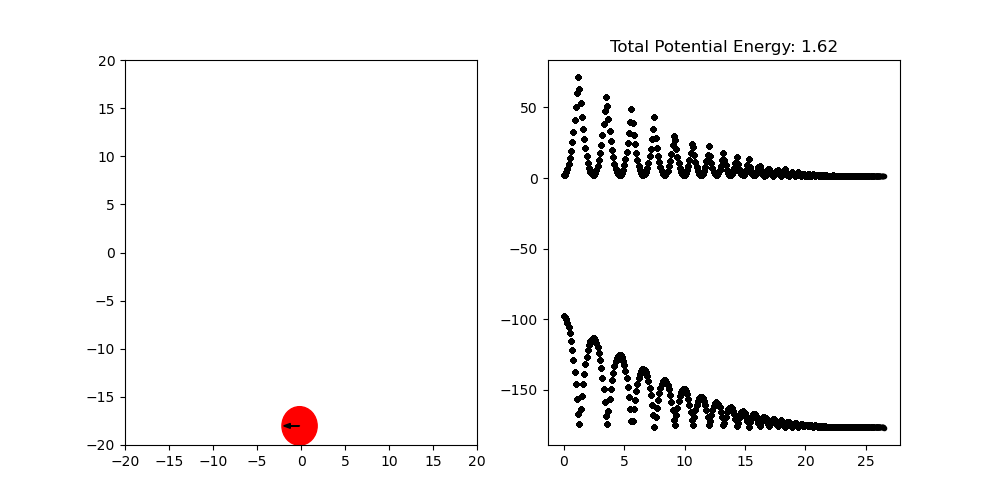

In [259]:
figE = plt.figure(figsize=(10,5))
axE = figE.add_subplot(121)
axE1 = figE.add_subplot(122)

def init():
    
    axE.clear()
    axE.set_xlim(-20,20)
    axE.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.1f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    PE = 0.
    
    for p in ball:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill = True)
        axE.add_patch(circle)
        
        axE.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        PE += p.m*9.8*y
        
        axE1.set_title(r'Total Kinetic Energy: {:.2f}'.format(KE))
        axE1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        axE1.set_title(r'Total Potential Energy: {:.2f}'.format(KE))
        axE1.scatter(t1[:i], p.GetPotentialEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(figE,Update,frames=len(t1),init_func=init)


Considerando los resultados de la gráfica y los mostrados en las gráficas que se muestran más adelante, el tiempo que tarda la pelota en estabilizarse y dejar de rebotar ronda los 21 segundos. La medida no se pudo realizar de manera precisa como consecuencia de la falta de tiempo.

---

(c). Suponga que no conociera la restitución. Use la altura de la pelota para calcular la restitución de la pelota con el suelo.

In [265]:
corpse = ball[0]

In [260]:
Angular = np.cross(corpse.GetPosition(scale), corpse.GetMomentum(scale))
px = corpse.GetMomentum(scale)[:,0]
py = corpse.GetMomentum(scale)[:,1]
Fx = corpse.m * corpse.A[:,0][::scale]
Fy = corpse.m * corpse.A[:,1][::scale]
Ek = corpse.VEk[::scale]
Ep = corpse.PE[::scale]

<IPython.core.display.Javascript object>


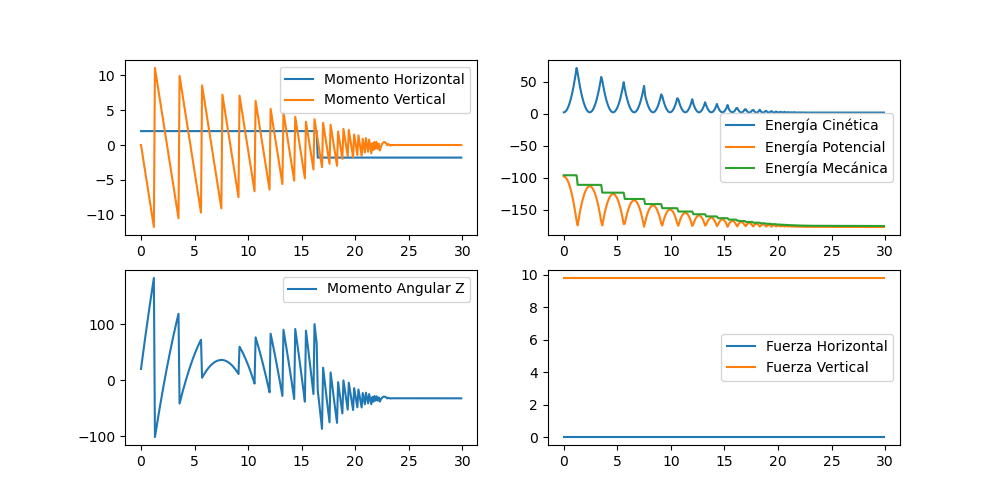

In [241]:
figV = plt.figure(figsize = (10, 5))
axV1 = figV.add_subplot(221)
axV2 = figV.add_subplot(222)
axV3 = figV.add_subplot(223)
axV4 = figV.add_subplot(224)


axV1.plot(t1, px, label = "Momento Horizontal") 
axV1.plot(t1, py, label = "Momento Vertical")
axV2.plot(t1, Ek, label = "Energía Cinética")
axV2.plot(t1, Ep, label = "Energía Potencial")
axV2.plot(t1, Ek + Ep, label = "Energía Mecánica")
axV3.plot(t1, Angular, label = "Momento Angular Z")
axV4.plot(t1, Fx, label = "Fuerza Horizontal")
axV4.plot(t1, Fy, label = "Fuerza Vertical")
axV1.legend()
axV2.legend()
axV3.legend()
axV4.legend()

**4. Falling Rod** La solución total del punto se muestra a continuación. Omitimos la parte teórica por el momento 